In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [2]:
#!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_canada = pd.read_excel('Canada.xlsx', 'Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [4]:
# print the dimensions of the dataframe
print(df_canada.shape)

(195, 43)


# Clean up data

In [5]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_canada.drop(['Type', 'Coverage', 'AREA', 'REG','DEV','DevName'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str,df_canada.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_canada.set_index('Country', inplace=True)

# add total column
df_canada['total'] = df_canada.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_canada.shape)

data dimensions: (195, 37)


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# Waffle Charts

In [8]:
#Let's revisit the previous case study about Denmark, Norway, and Sweden.

# let's create a new dataframe for these three countries 
df_DNS = df_canada.loc[['Denmark', 'Norway','Sweden'], :]

# let's take a look at our dataframe
df_DNS

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,272,293,299,106,93,73,93,109,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,116,77,106,51,31,54,56,80,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,281,308,222,176,128,158,187,198,...,205,139,193,165,167,159,134,140,140,5866


waffle charts are not built into any of the Python visualization libraries. Let's create them from scratch

In [9]:
# compute the proportion of each category with respect to the total
total_values= sum(df_DNS['total'])
category_proportion = [(float(value)/total_values) for value in df_DNS['total']]

# print out proportions
for i, proportion in enumerate(category_proportion):
    print(df_DNS.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


Defining the overall size of the waffle chart.

In [15]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height  # total number of tiles

print('Total number of Titles is ', total_num_titles)

Total number of Titles is  1600


The third step is using the proportion of each category to determe it respective number of tiles

In [16]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportion]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_DNS.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [17]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
            
print ('Waffle chart populated!')

Waffle chart populated!


In [18]:
#lets take a look at the matrix
waffle_chart

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

Step 5. Map the waffle chart matrix into a visual.

<Figure size 432x288 with 0 Axes>

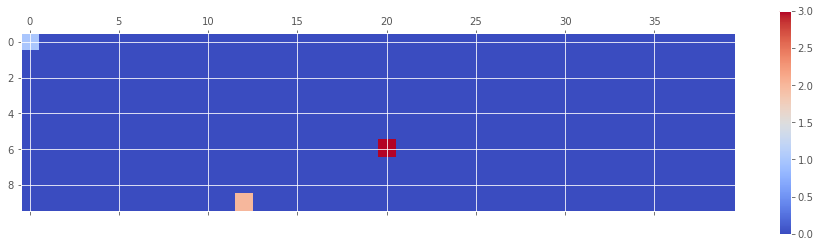

In [19]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

Step 6. Prettify the chart.

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

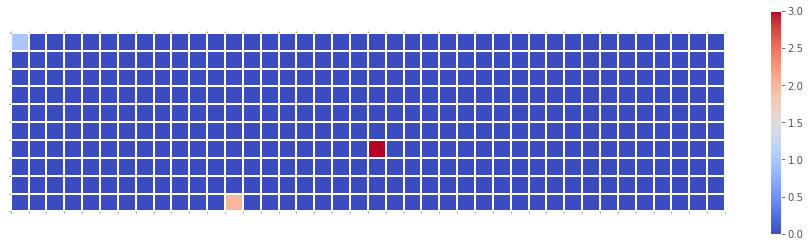

In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

Step 7. Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

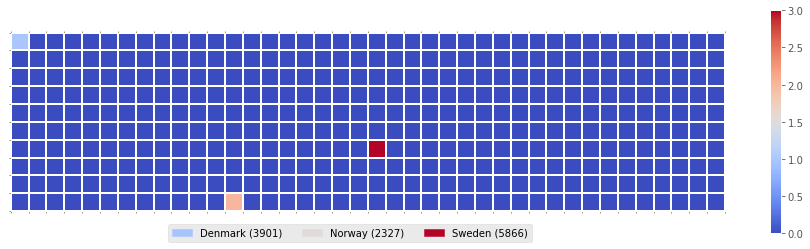

In [33]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_DNS['total'])
total_values = values_cumsum[len(values_cumsum) -1]

# create legend
legend_handles = []
for i, category in enumerate(df_DNS.index.values):
    label_str = category + ' (' + str(df_DNS['total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol = len(df_DNS.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1))                                      

# Function called create_waffle_chart

In [39]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign =''):
    
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]
    
    # compute the total number of tiles
    total_num_tiles = width * height 
    print('Total number of tiles is: ', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_DNS.index.values[i] + ':' + str(tiles))
        
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))
    
    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0
    
    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1
                
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
            
    # instantiate a new figure object
    fig = plt.figure()
            
    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    # get the axis
    ax = plt.gca()
    
    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum=np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) -1]        
                
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + '(' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' +  value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    #add legend to char
    plt.legend(handles=legend_handles, loc='lower center', ncol=len(categories), bbox_to_anchor=(0., -0.2, 0.95, .1))
    
    

In [40]:
width = 40
height = 10

categories = df_DNS.index.values
values = df_DNS['total']

colormap = plt.cm.coolwarm

Total number of tiles is:  400
Denmark:129
Norway:77
Sweden:194


<Figure size 432x288 with 0 Axes>

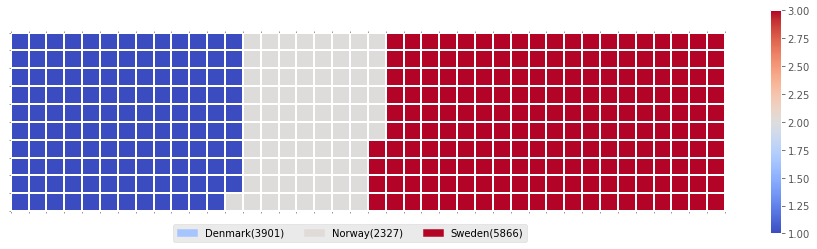

In [41]:
#call function to create a `waffle` chart
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds

In [ ]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

ModuleNotFoundError: No module named 'wordcloud'